# Importing Libraries

In [2]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# loading the dataset


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


# Metrics and Losses

In [4]:
from sklearn.metrics import accuracy_score


# Plotting the Initial Figure to check if the dataset is loaded correctly or not

In [6]:
import matplotlib.pyplot as plt

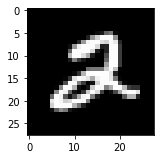

In [8]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(X_train[5,:,:], cmap='gray')
#plt.title("Ground Truth : {}".format(y_train[0]))

# Reshaping the Train Test arrays

In [9]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
X_train /= 255
X_test /= 255

In [15]:
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


# Building the Model 

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(25, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(1,1)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))


In [28]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [30]:
model.fit(X_train, 
            Y_train, 
            batch_size=128, 
            epochs=10, 
            validation_data=(X_test, Y_test))

Epoch 1/10
469/469 [==============================] - 15s 31ms/step - loss: 0.3014 - accuracy: 0.9159 - val_loss: 0.1509 - val_accuracy: 0.9589
Epoch 2/10
469/469 [==============================] - 15s 31ms/step - loss: 0.1159 - accuracy: 0.9671 - val_loss: 0.0894 - val_accuracy: 0.9743
Epoch 3/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0768 - accuracy: 0.9782 - val_loss: 0.0715 - val_accuracy: 0.9786
Epoch 4/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0617 - accuracy: 0.9821 - val_loss: 0.0650 - val_accuracy: 0.9798
Epoch 5/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0504 - accuracy: 0.9851 - val_loss: 0.0649 - val_accuracy: 0.9802
Epoch 6/10
469/469 [==============================] - 15s 31ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0619 - val_accuracy: 0.9813
Epoch 7/10
469/469 [==============================] - 15s 32ms/step - loss: 0.0370 - accuracy: 0.9888 - val_loss: 0.0654 - val_accuracy:

In [31]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0624 - accuracy: 0.9822


[0.062360987067222595, 0.982200026512146]

In [32]:
from sklearn.metrics import f1_score

In [ ]:
f1_score()